*Cristopher Velasco Avila*

# Tarea 2 - Caso pandas

## Instrucciones.

Accede al sitio web proporcionado y descarga los 4 parquets de taxis de NYC para Enero de 2025. A partir de la información que se encuentra en los datasets, elabora 2 notebooks (uno con Pandas y otro con Polars) reportando por lo menos lo siguiente en un informe estadístico:

In [1]:
# Importamos las librerias

import polars as pl
import matplotlib.pyplot as plt
import numpy as np

### 1. Promedio de ingresos brutos de cada tipo de taxi y de todos los taxis
Importamos los archivos parquet como dataframes con diferentes nombres cada uno. Posteriormente se va a extraer información de las columnas de cada uno. Para lograr ello, usamos el metodo ```pl.read_parquet```

In [2]:
yellow = pl.read_parquet("yellow_tripdata_2025-01.parquet")
green = pl.read_parquet("green_tripdata_2025-01.parquet")
forHire = pl.read_parquet("fhvhv_tripdata_2025-01.parquet")

Con los dataframes creados ya podemos empezar a obtener las columnas de cada uno.
Segun la documentación sobre los dataframes obtenida de nyc.gov acerca de los reportes de [taxis amarillos y verdes](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf) (las columnas usadas para yellow y green son las mismas) y los obtenidos en [taxis contratados con anterioridad](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_hvfhs.pdf), las columnas que debemos consultar para los ingresos son *total_amount* y *base_passenger_fare*

In [8]:
pY = yellow["total_amount"].mean()
pG = green["total_amount"].mean()
pFH = forHire["base_passenger_fare"].mean()

print("Promedio de los taxis amarillos:", pY)
print("Promedio de los taxis verdes:", pG)
print("Promedio de los taxis contratados:", pFH)

print("\nPromedio entre los tres taxis:", np.mean([pY,pG,pFH]))



Promedio de los taxis amarillos: 25.611291697288177
Promedio de los taxis verdes: 22.634241609071722
Promedio de los taxis contratados: 24.265754373809703

Promedio entre los tres taxis: 24.1704292267232


Como conclusión a este punto, podemos apreciar que en los viajes se tiene una media de 23-24 dolares.

### 2. Qué tipo de taxis recorrieron la mayor cantidad de distancia en Enero

Al igual que el punto anterior, obtenemos los valores de las distancias indicadas en las columnas de la documentación.

In [22]:
dY = yellow["trip_distance"].sum()
dG = green["trip_distance"].sum()
dFH = forHire["trip_miles"].sum()

print("Distancia de amarillos:", dY)
print("Distancia de verdes:", dG)
print("Distancia de contratados", dFH)

print("\nTaxis que mas recorrieron:", np.max([dY,dG,dFH]))

Distancia de amarillos: 20347886.729999997
Distancia de verdes: 1040575.2500000001
Distancia de contratados 98978656.50900005

Taxis que mas recorrieron: 98978656.50900005


Curiosamente, los taxis contratados particulares recorren mucha mas distancia (y por tanto, son mas usados) que los taxis amarillos estandar y verdes.

### 3. Qué tipo de taxi recibe más propinas en promedio

Accedemos a las columnas *tip_amount* para los taxis amarillos y verde y *tips* para los taxis particulares

In [21]:
tY = yellow["tip_amount"].sum()
tG = green["tip_amount"].sum()
tFH = forHire["tips"].sum()

print("Propinas obtenidas de amarillos:", tY)
print("Propinas obtenidas de verdes:", tG)
print("Propinas obtenidas de contratados:", tFH)

print("\nRecibio mas propinas:", np.max([tY,tG,tFH]))

Propinas obtenidas de amarillos: 10286018.349999998
Propinas obtenidas de verdes: 119938.32
Propinas obtenidas de contratados: 21247787.65000001

Recibio mas propinas: 21247787.65000001


Como era de esperarse y de acuerdo a los resultados previos, los taxis que obtuvieron ams propinas son los particulares

### 4. Gráfico de barras reportando el importe del peaje total de cada tipo de Taxi


89005026.8 1093822.36 495158878.98999995


Text(0.5, 1.0, 'Ganancias totales por cada taxi')

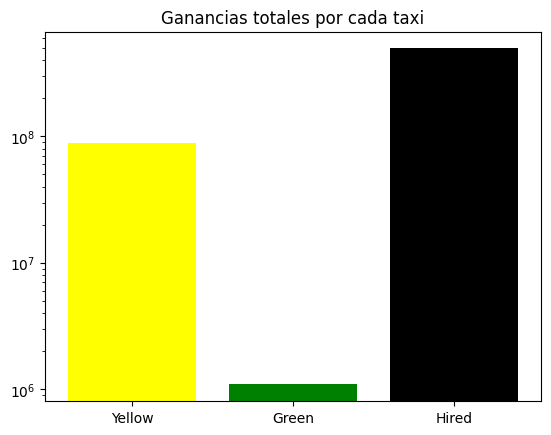

In [24]:
taxis = ["Yellow","Green","Hired"]

totYellow = yellow["total_amount"].sum()
totGreen = green["total_amount"].sum()
totHire = forHire["base_passenger_fare"].sum()
print(totYellow,totGreen,totHire)

ventas = [totYellow,totGreen,totHire]

plt.bar(taxis, ventas, color=["yellow","green","black"])
plt.yscale("log")
plt.title("Ganancias totales por cada taxi")

Se ha decidido usar una escala logaritmica, de lo contrario, el resultado de los taxis verdes, que son usados muy pocas veces, no se mostraria siquiera en una escala normal.